In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
from persim import plot_diagrams

# Generate numpy array of random points on 3-sphere

## Parametrisation of 3-sphere:  
$x = r \cdot \cos(\phi)$  
$y = r \cdot \sin(\phi) \cdot \cos(\psi)$  
$z = r \cdot \sin(\phi) \cdot \sin(\psi) \cdot \cos(\theta)$  
$w = r \cdot \sin(\phi) \cdot \sin(\psi) \cdot \sin(\theta)$  

n = #points on 3-sphere  
r = radius of 3-sphere

In [33]:
n = 300
r = 1

phi = np.random.rand(n)*2*np.pi
psi = np.random.rand(n)*np.pi
theta = np.random.rand(n)*np.pi


x = r * np.cos(phi)
y = r * np.sin(phi) * np.cos(psi)
z = r * np.sin(phi) * np.sin(psi) * np.cos(theta)
w = r * np.sin(phi) * np.sin(psi) * np.sin(theta)

S = np.array([x,y,z])
print('Shape of S: {}'.format(S.shape))

Shape of S: (3, 300)


# Plot of dataset S

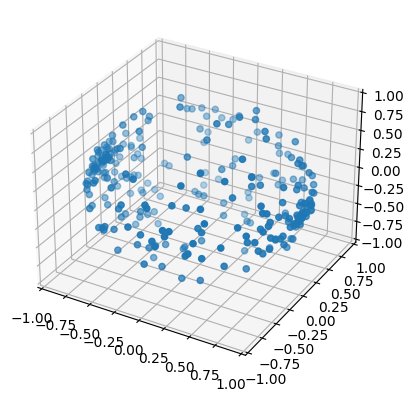

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(S[0,:],S[1,:],S[2,:])
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
plt.show()

# Calculate distance matrix D and write it to .csv file

In [35]:
D = np.zeros((n,n))

for i in range(n):
    for j in range(i):
        D[i,j] = np.linalg.norm(S[:,i]-S[:,j])

D = D+D.T

np.savetxt("dm_3-sphere.csv", D, delimiter=",")

# Compute persistent homology

In [36]:
ph = ripser(D, distance_matrix=True, maxdim=3)

# Print persistent intervals

In [37]:
pi = ph['dgms']
for deg in range(len(pi)):
    print('Persistent Intervals in dimension {}:'.format(deg))
    print(pi[deg])
    print()

Persistent Intervals in dimension 0:
[[0.         0.00190664]
 [0.         0.00193706]
 [0.         0.00314632]
 [0.         0.00478318]
 [0.         0.00895881]
 [0.         0.00962293]
 [0.         0.01067573]
 [0.         0.01177021]
 [0.         0.01194624]
 [0.         0.01245128]
 [0.         0.01337774]
 [0.         0.01340182]
 [0.         0.01374402]
 [0.         0.01454142]
 [0.         0.01637346]
 [0.         0.01675641]
 [0.         0.01846318]
 [0.         0.01915983]
 [0.         0.019422  ]
 [0.         0.02057059]
 [0.         0.0213954 ]
 [0.         0.02186686]
 [0.         0.02244967]
 [0.         0.02470458]
 [0.         0.02516021]
 [0.         0.02596157]
 [0.         0.02666952]
 [0.         0.0273965 ]
 [0.         0.0277067 ]
 [0.         0.02995838]
 [0.         0.02998909]
 [0.         0.03060427]
 [0.         0.03065925]
 [0.         0.03095009]
 [0.         0.03120028]
 [0.         0.03183902]
 [0.         0.03264754]
 [0.         0.0345236 ]
 [0.         

# Plot persistent intervals

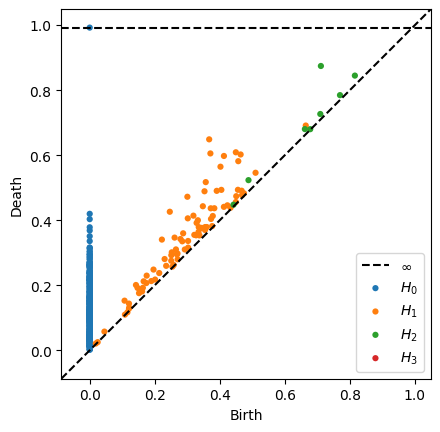

In [38]:
plot_diagrams(pi, show=True)